# 02582 Computational Data Analysis - Case 2

**Group 16 - members**:
- Anastasia Maftei: s226765
- Beatriz Braga De Carvalho: s233576
- Raquel Moleiro Marques: s243636
- Sree Keerthi Desu: s243933

___________

### Imports

In [494]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score

________

## Load data

In [495]:
data = pd.read_csv('data/HR_data_2.csv')
data.head()

,Unnamed: 0,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [496]:
data.columns

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [497]:
# Remove the first column
data = data.drop(columns=['Unnamed: 0'])

In [498]:
data.info() # Detailed information on features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HR_TD_Mean           312 non-null    float64
 1   HR_TD_Median         312 non-null    float64
 2   HR_TD_std            312 non-null    float64
 3   HR_TD_Min            312 non-null    float64
 4   HR_TD_Max            312 non-null    float64
 5   HR_TD_AUC            312 non-null    float64
 6   HR_TD_Kurtosis       312 non-null    float64
 7   HR_TD_Skew           312 non-null    float64
 8   HR_TD_Slope_min      312 non-null    float64
 9   HR_TD_Slope_max      312 non-null    float64
 10  HR_TD_Slope_mean     312 non-null    float64
 11  HR_TD_Slope          312 non-null    float64
 12  TEMP_TD_Mean         312 non-null    float64
 13  TEMP_TD_Median       312 non-null    float64
 14  TEMP_TD_std          312 non-null    float64
 15  TEMP_TD_Min          312 non-null    flo

In [499]:
# Check for missing values
# print vars that have missing values and their counts
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)

Missing values:
 EDA_TD_P_RT     1
EDA_TD_P_ReT    1
inspired        2
attentive       1
afraid          1
active          1
determined      2
dtype: int64


In [500]:
id_columns = ['Round', 'Phase', 'Individual', 'Puzzler', 'original_ID', 'raw_data_path', 'Team_ID', 'Cohort']

In [501]:
# Extract questionnaire data
questionnaire = data[[col for col in data.columns if 'EDA_' not in col if 'TEMP_' not in col if 'HR_' not in col]].copy()

# Extract numerical data
numerical = data[[col for col in data.columns if 'EDA_' in col or 'TEMP_' in col or 'HR_' in col or col in col in id_columns ]].copy()

In [502]:
# Extract individual time domain signal measures
heart_rate = pd.concat([data[id_columns], data[[col for col in data.columns if 'HR_TD_' in col]]], axis=1)
temperature = pd.concat([data[id_columns], data[[col for col in data.columns if 'TEMP_TD_' in col]]], axis=1)
eda_phasic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_P_' in col]]], axis=1)
# ^ also has reaction tie, peaks, and rise time
eda_tonic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_T_' in col]]], axis=1)

__________

# Preliminary analysis

In [503]:
# Generate histograms
def hist_subplots(dataset, id_columns, fig=None):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]
    # print(dataset[dataset['Phase']=='phase1'])
    # Plot distribution of each feature
    if fig is None:
        fig = plt.figure(figsize=(20, 40))
    for i, col in enumerate(rel_features):
        plt.subplot(15, 4, i + 1)
        sns.histplot(dataset[dataset['Phase']=='phase1'][col], color='green', alpha=0.5, label='Phase 1', kde=True)
        sns.histplot(dataset[dataset['Phase']=='phase2'][col], color='red', alpha=0.5, label='Phase 2', kde=True)
        sns.histplot(dataset[dataset['Phase']=='phase3'][col], color='yellow', alpha=0.5, label='Phase 3', kde=True)
        plt.legend()
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [504]:
# Generate correlation matrix
def corr_heatmap(dataset, id_columns):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]

    # Subset with only relevant features
    subset_ph1 = dataset[dataset['Phase']=='phase1'][rel_features]
    subset_ph2 = dataset[dataset['Phase']=='phase2'][rel_features]
    subset_ph3 = dataset[dataset['Phase']=='phase3'][rel_features]

    # Triangular correlation matrix
    mask_1 = np.triu(np.ones_like(subset_ph1.corr(), dtype=bool))
    mask_2 = np.triu(np.ones_like(subset_ph2.corr(), dtype=bool))
    mask_3 = np.triu(np.ones_like(subset_ph3.corr(), dtype=bool))

    # Correlation heatmap
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.title('Phase 1 Correlation matrix')
    sns.heatmap(subset_ph1.corr(), mask=mask_1, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
    plt.subplot(1, 3, 2)
    plt.title('Phase 2 Correlation matrix')
    sns.heatmap(subset_ph2.corr(), mask=mask_2, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
    plt.subplot(1, 3, 3)
    plt.title('Phase 3 Correlation matrix')
    sns.heatmap(subset_ph3.corr(), mask=mask_3, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)
    plt.show()

## Numerical data
### Heart rate

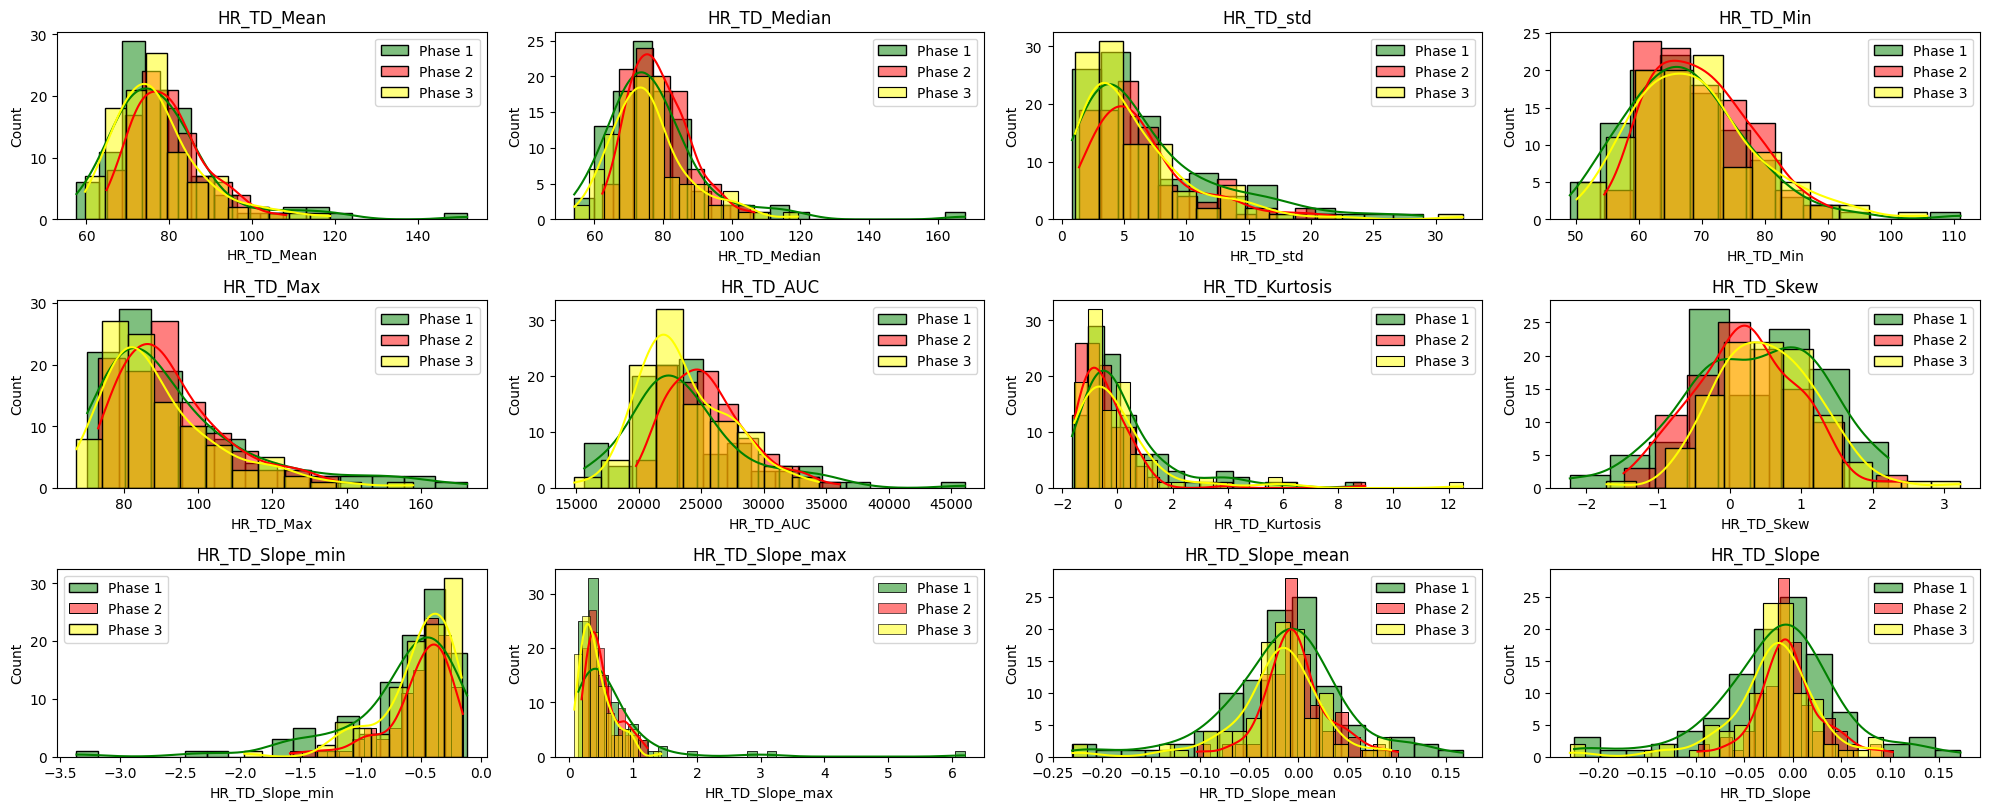

In [505]:
hist_subplots(heart_rate, id_columns)

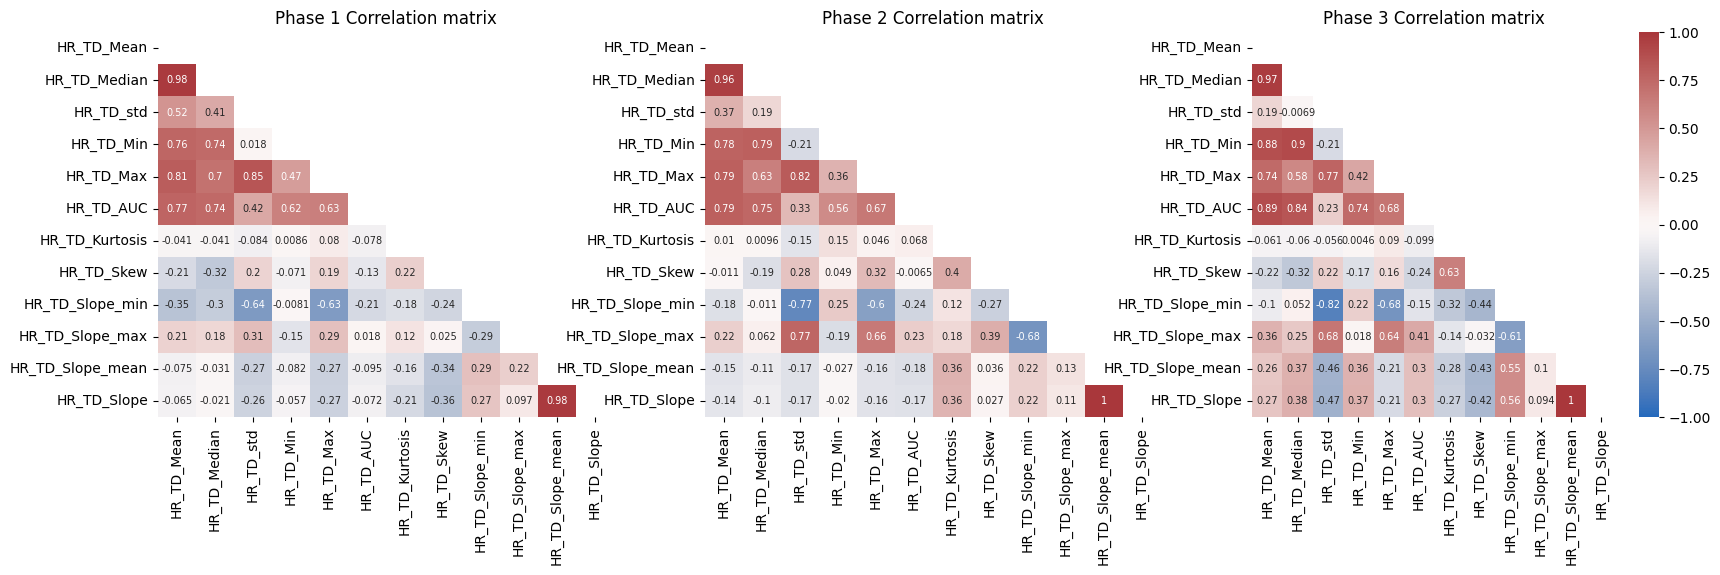

In [506]:
corr_heatmap(heart_rate, id_columns)

### Temperature

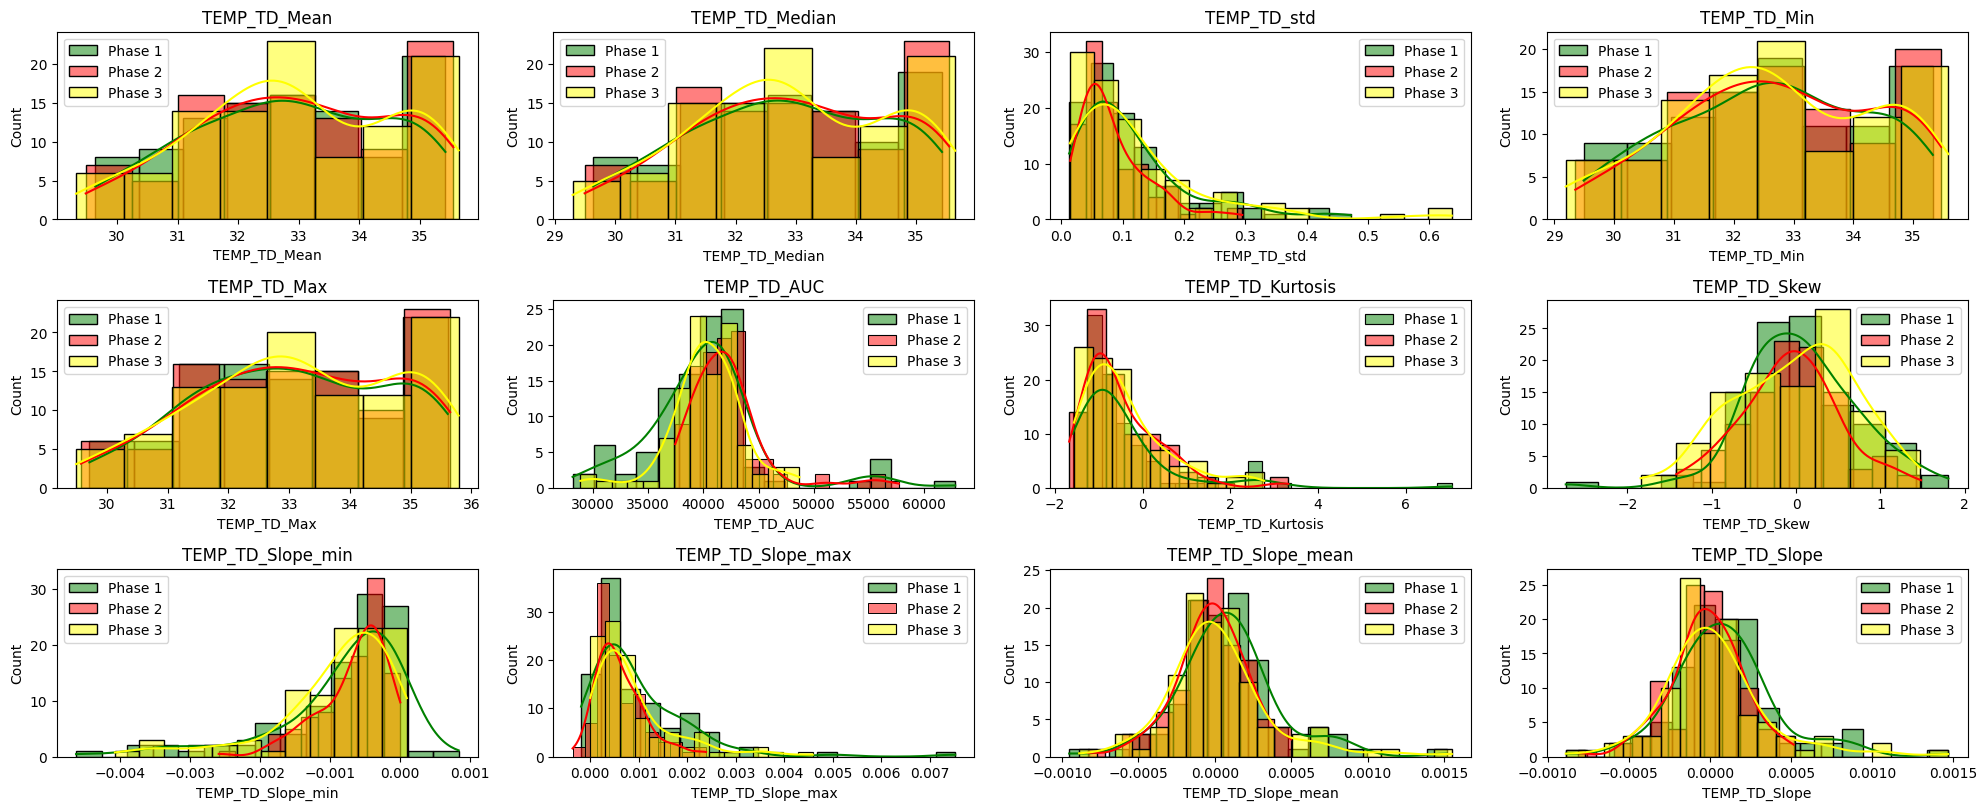

In [507]:
hist_subplots(temperature, id_columns)

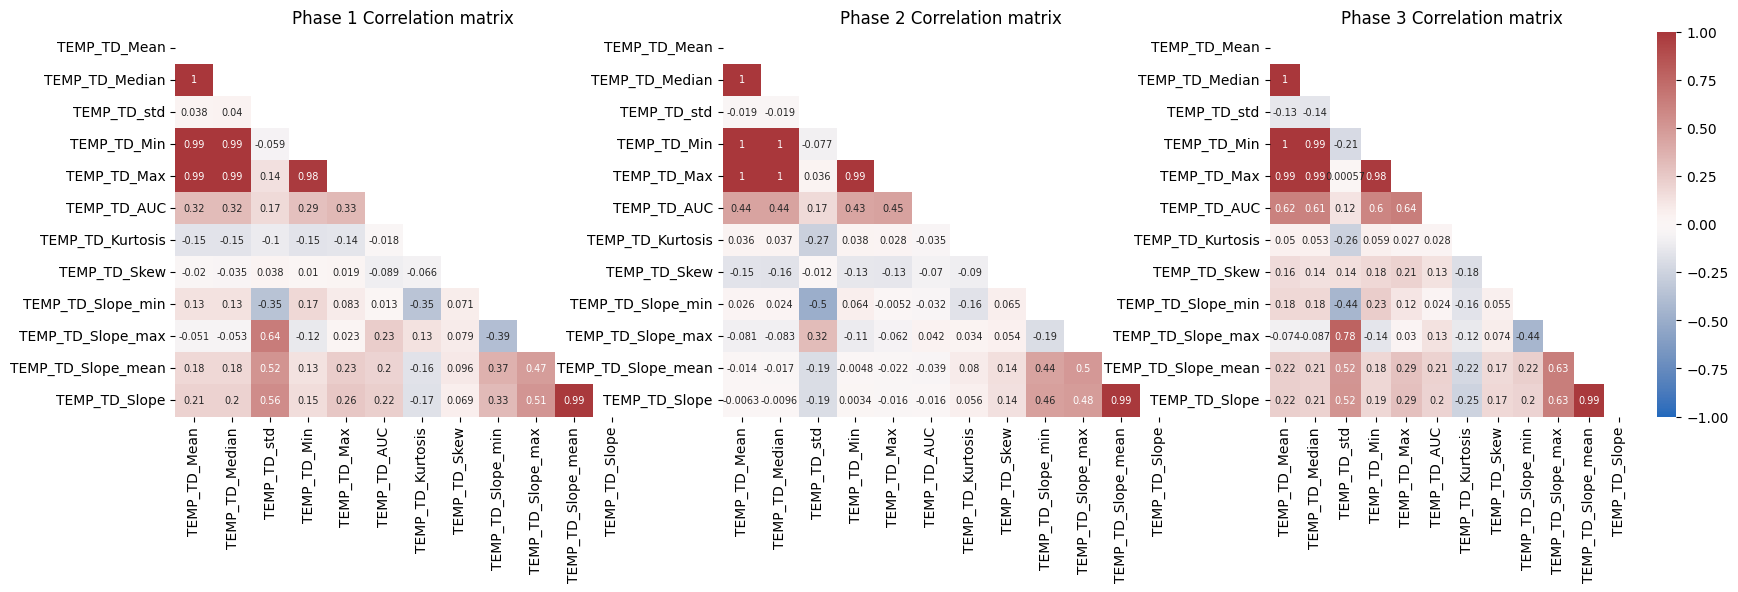

In [508]:
corr_heatmap(temperature, id_columns)

### EDA Phasic

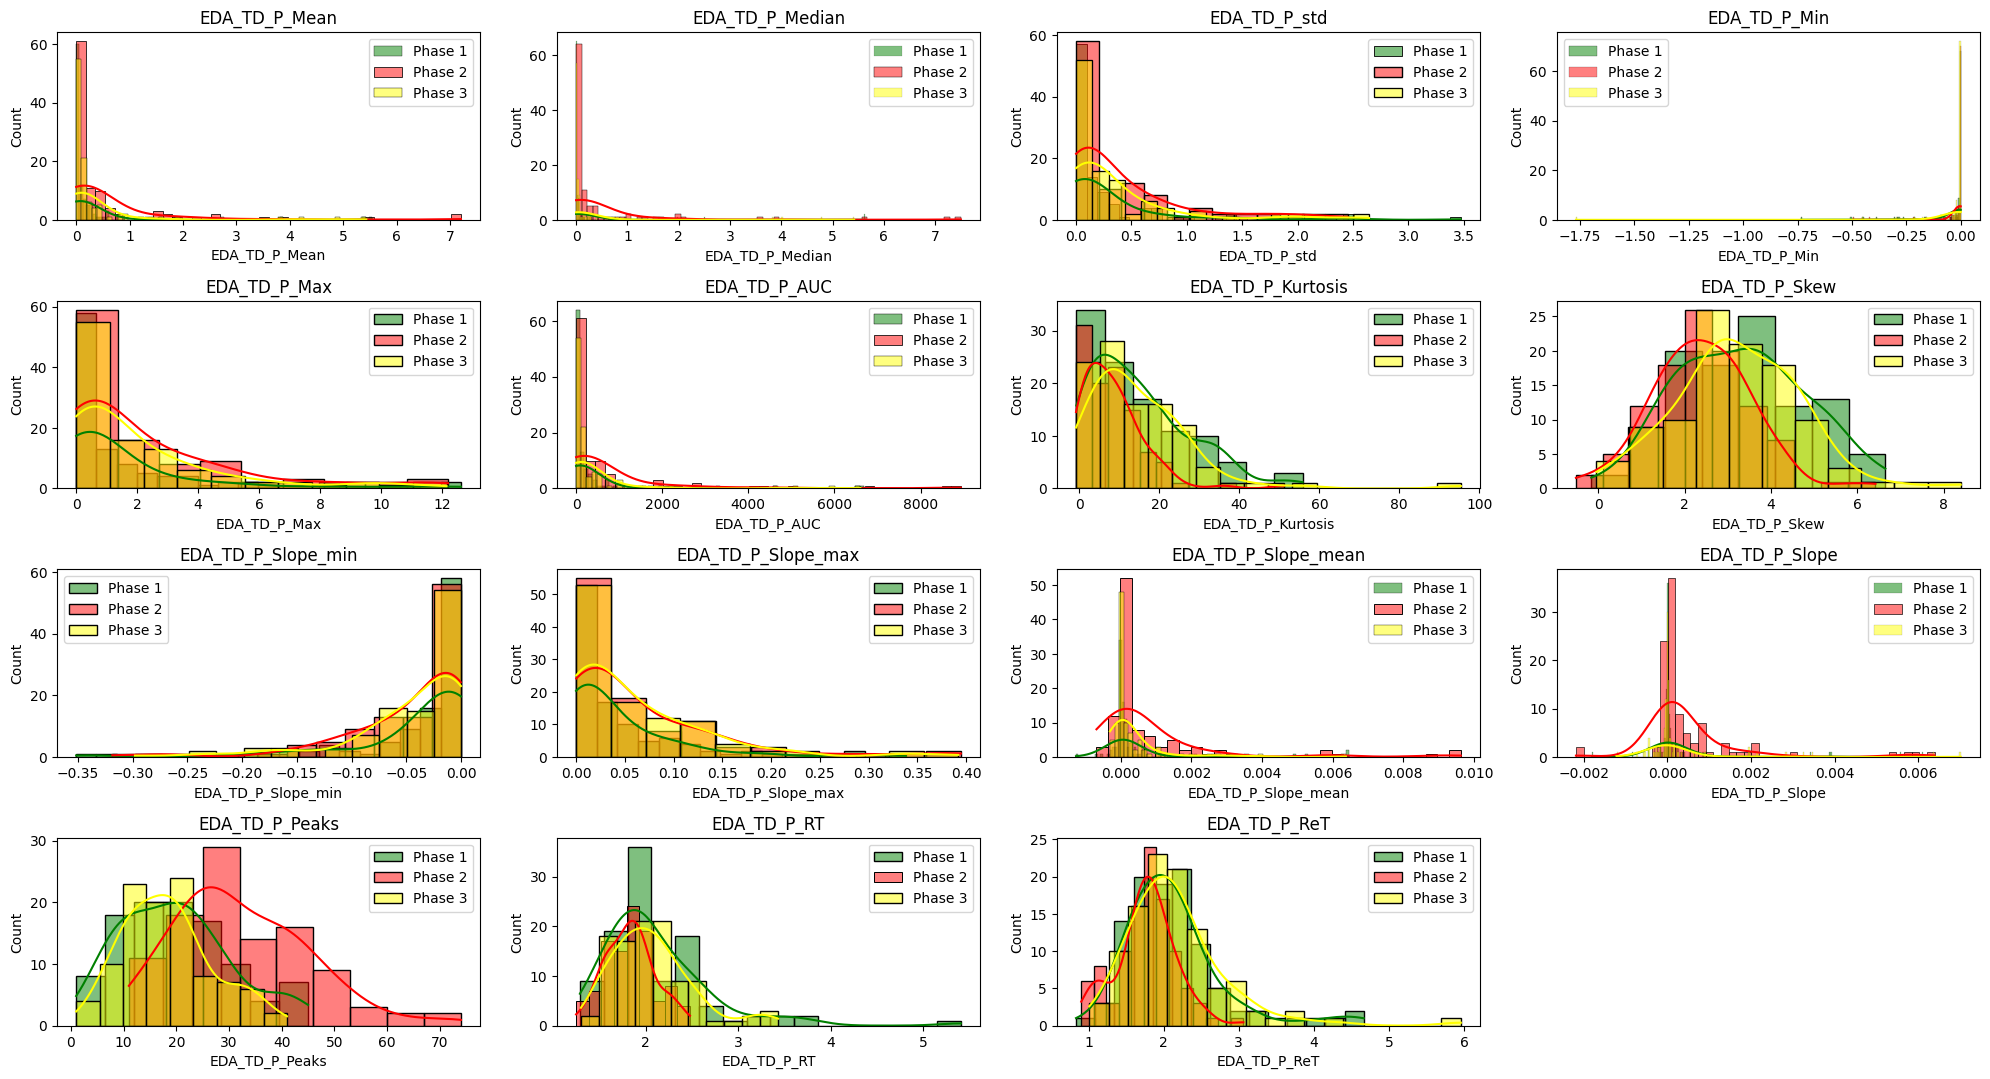

In [509]:
hist_subplots(eda_phasic, id_columns)

In [510]:
data[data['Phase']=='phase1']['EDA_TD_P_Peaks'].describe()

count    104.000000
mean      19.846154
std       10.478614
min        1.000000
25%       11.750000
50%       19.500000
75%       26.250000
max       45.000000
Name: EDA_TD_P_Peaks, dtype: float64

In [511]:
data[data['Phase']=='phase2']['EDA_TD_P_Peaks'].describe()

count    104.000000
mean      32.384615
std       12.717473
min       11.000000
25%       23.750000
50%       30.000000
75%       41.000000
max       74.000000
Name: EDA_TD_P_Peaks, dtype: float64

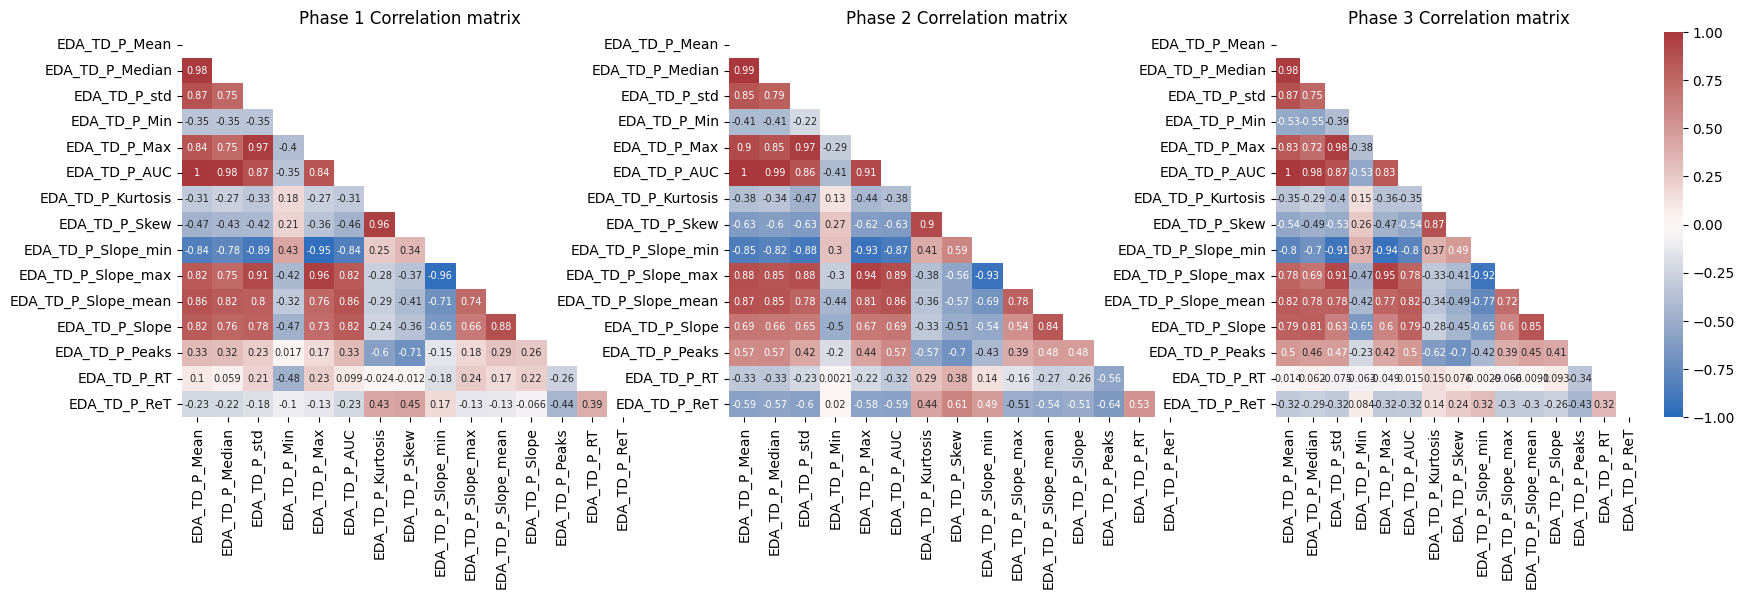

In [512]:
corr_heatmap(eda_phasic, id_columns)

### EDA Tonic

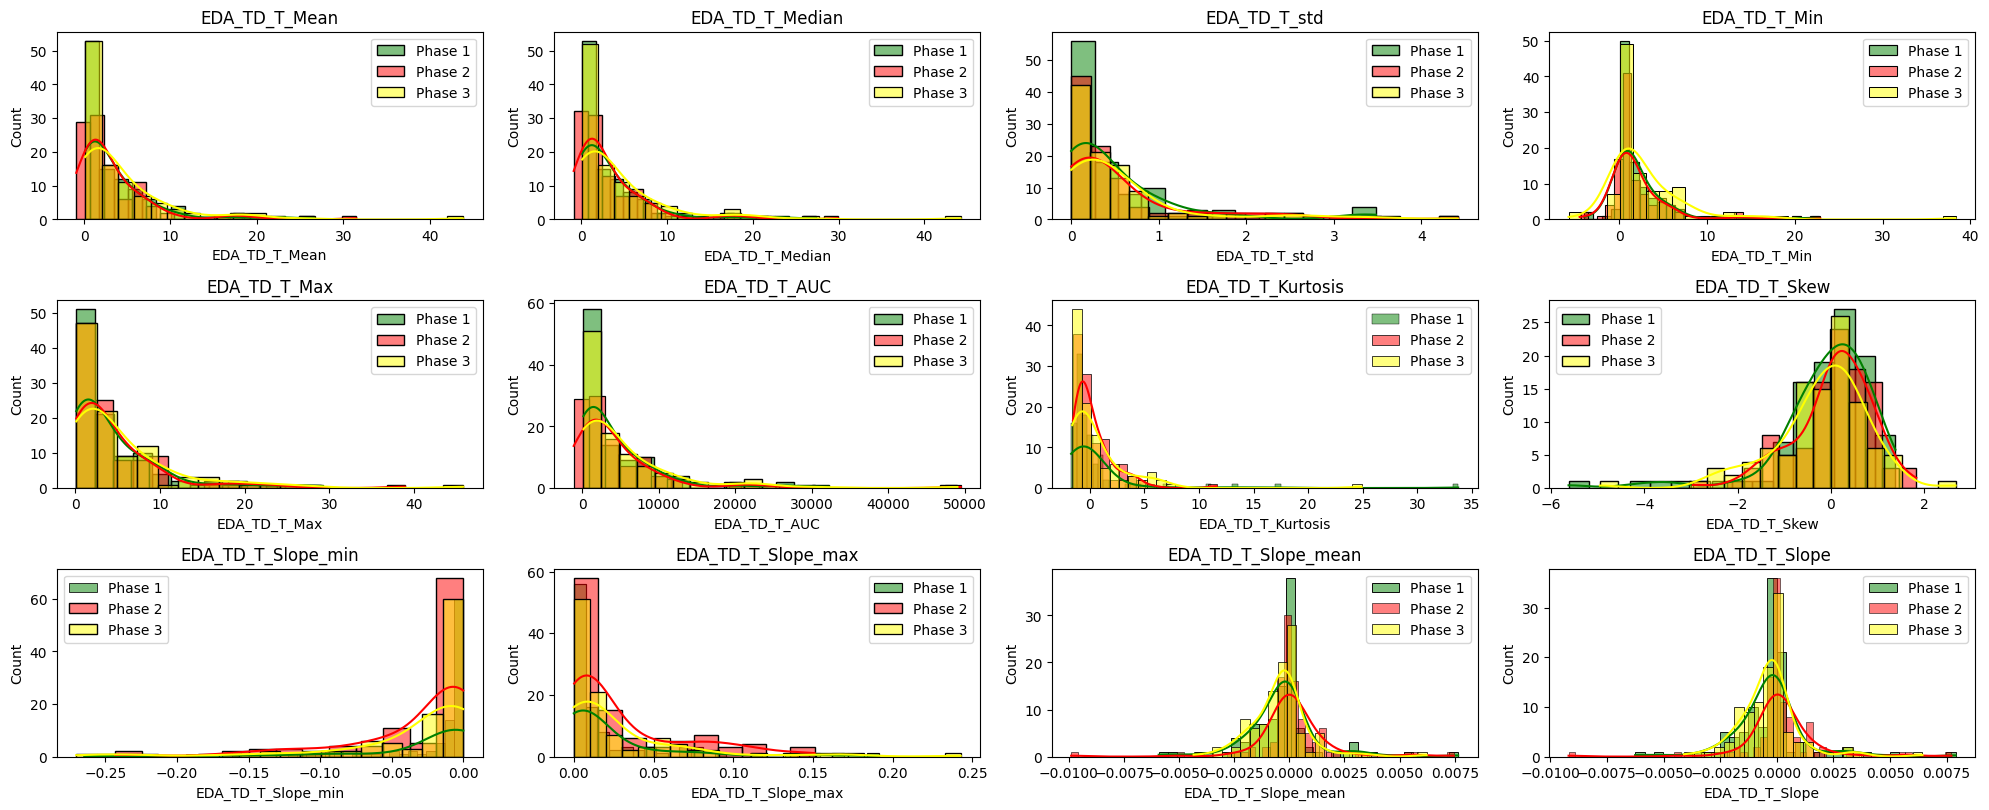

In [513]:
hist_subplots(eda_tonic, id_columns)

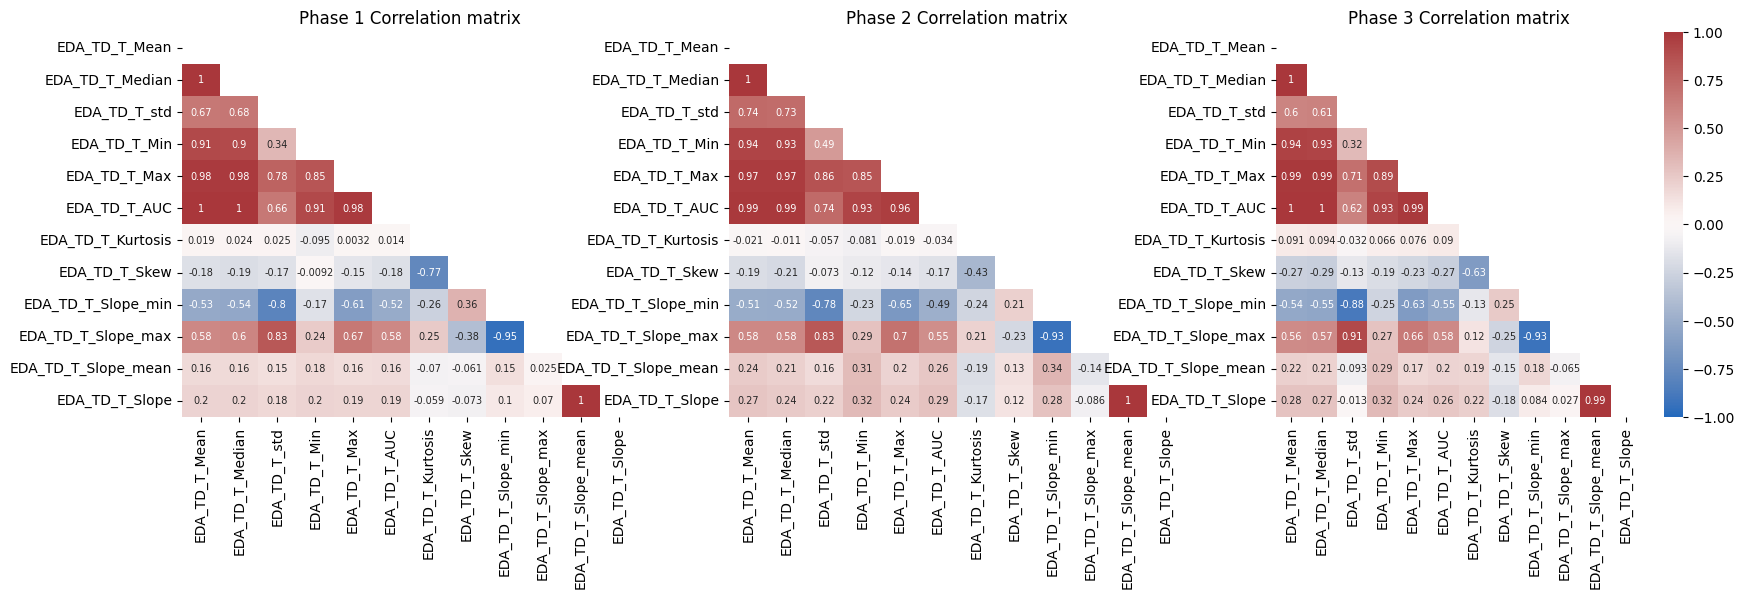

In [514]:
corr_heatmap(eda_tonic, id_columns)

## Questionnaire data

In [515]:
questionnaire_features = [col for col in questionnaire.columns if col not in id_columns]

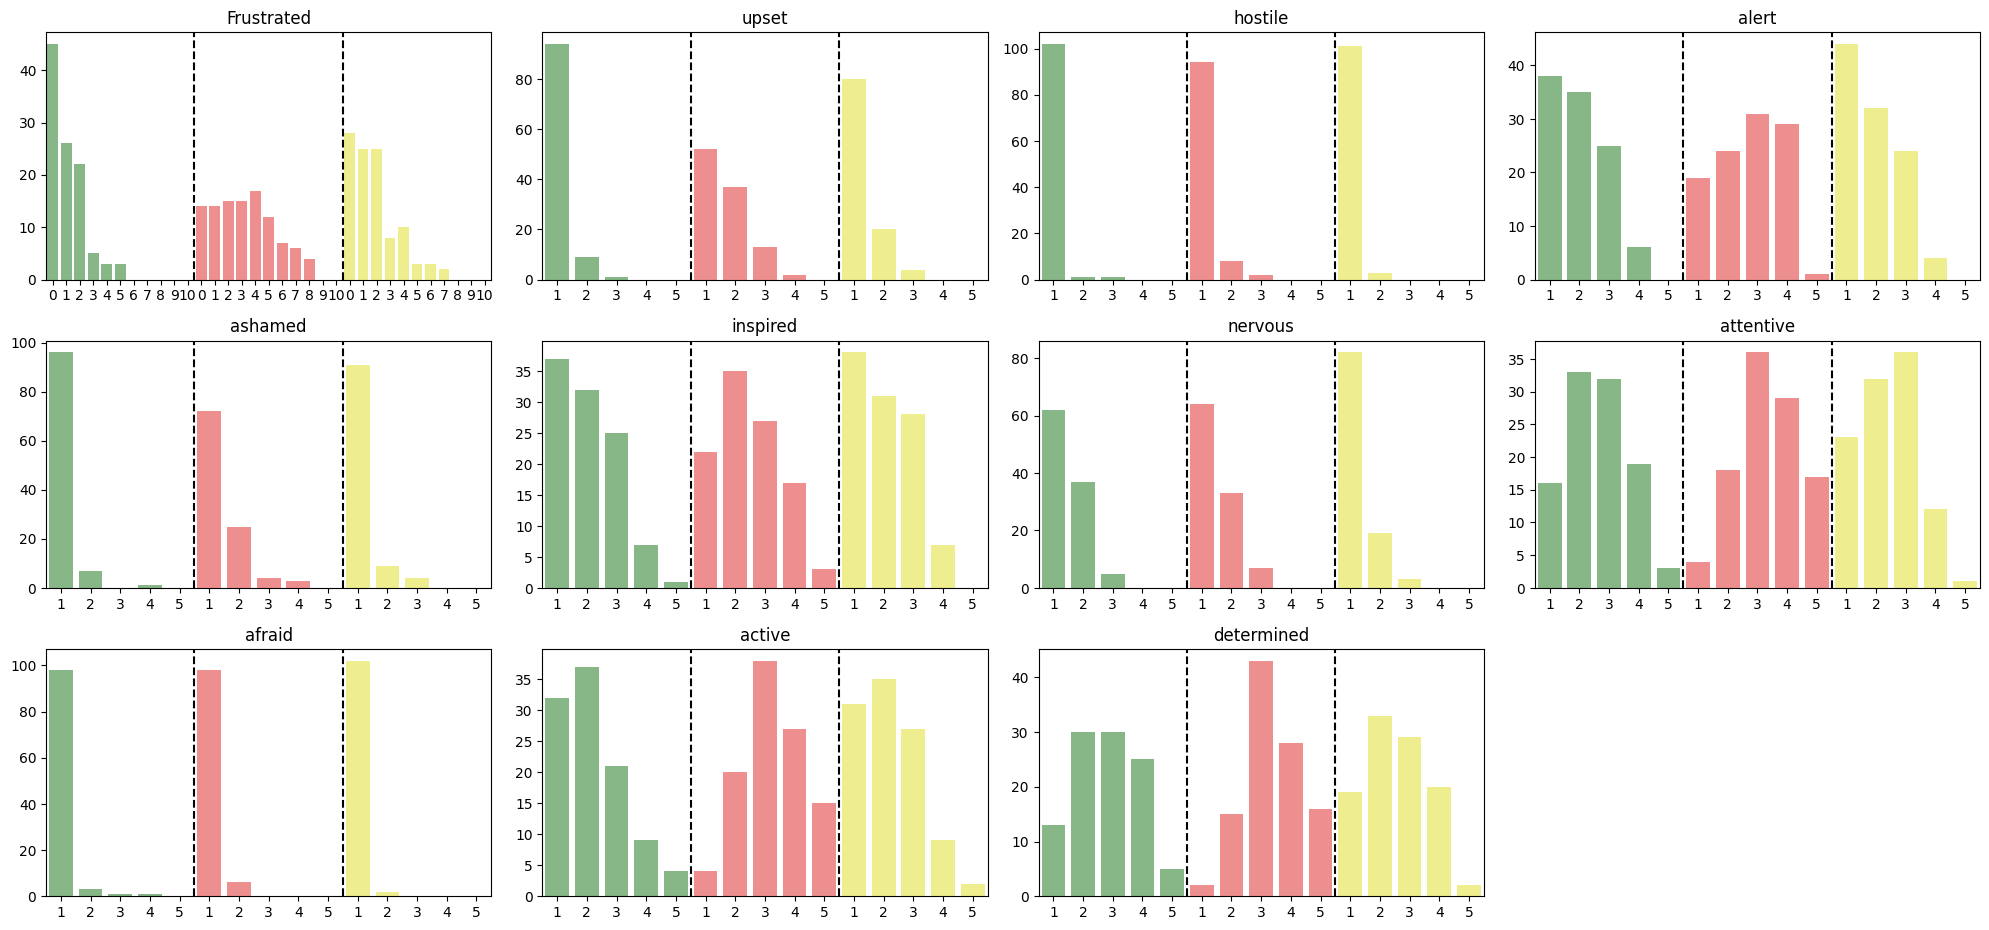

In [516]:
plt.figure(figsize=(20, 40))
# _, ax = plt.subplots(6, 3, figsize=(20,10))
for i, col in enumerate(questionnaire_features):
    if col.lower() == 'frustrated':
        full_range = list(range(0, 11))  # 0 to 10
    else:
        full_range = list(range(1, 6))   # 1 to 5

    value_counts_ph1 = questionnaire[questionnaire['Phase']=='phase1'][col].value_counts().reindex(full_range, fill_value=0)
    value_counts_ph2 = questionnaire[questionnaire['Phase']=='phase2'][col].value_counts().reindex(full_range, fill_value=0)
    value_counts_ph3 = questionnaire[questionnaire['Phase']=='phase3'][col].value_counts().reindex(full_range, fill_value=0)

    # Convert x to string to treat them as categorical labels
    plt.subplot(13, 4, i + 1)
    sns.barplot(x=[str(x) for x in value_counts_ph1.index], y=value_counts_ph1.values, color='green', alpha=0.5)
    sns.barplot(x=[str(x+0.01) for x in value_counts_ph2.index], y=value_counts_ph2.values, color='red', alpha=0.5)
    sns.barplot(x=[str(x+0.02) for x in value_counts_ph3.index], y=value_counts_ph3.values, color='yellow', alpha=0.5)
    # plt.legend()

    plt.xticks([i for i, val in enumerate([str(x) for x in full_range]*3)], [str(x) for x in full_range]*3)

    if i==0:
        plt.axvline(x=10.5, color='black', linestyle='--')
        plt.axvline(x=21.5, color='black', linestyle='--')
    else:
        plt.axvline(x=4.5, color='black', linestyle='--')
        plt.axvline(x=9.5, color='black', linestyle='--')
    
    # sns.catplot(data=questionnaire, x=col, hue='Phase', kind='count', palette=['green', 'red', 'yellow'], alpha=0.5, dodge=True, height=4, aspect=2)
                # , ax=ax[i//3][i%3])
    
    plt.title(col)
    plt.xlabel("")  
    plt.ylabel("")



plt.tight_layout()
plt.show()

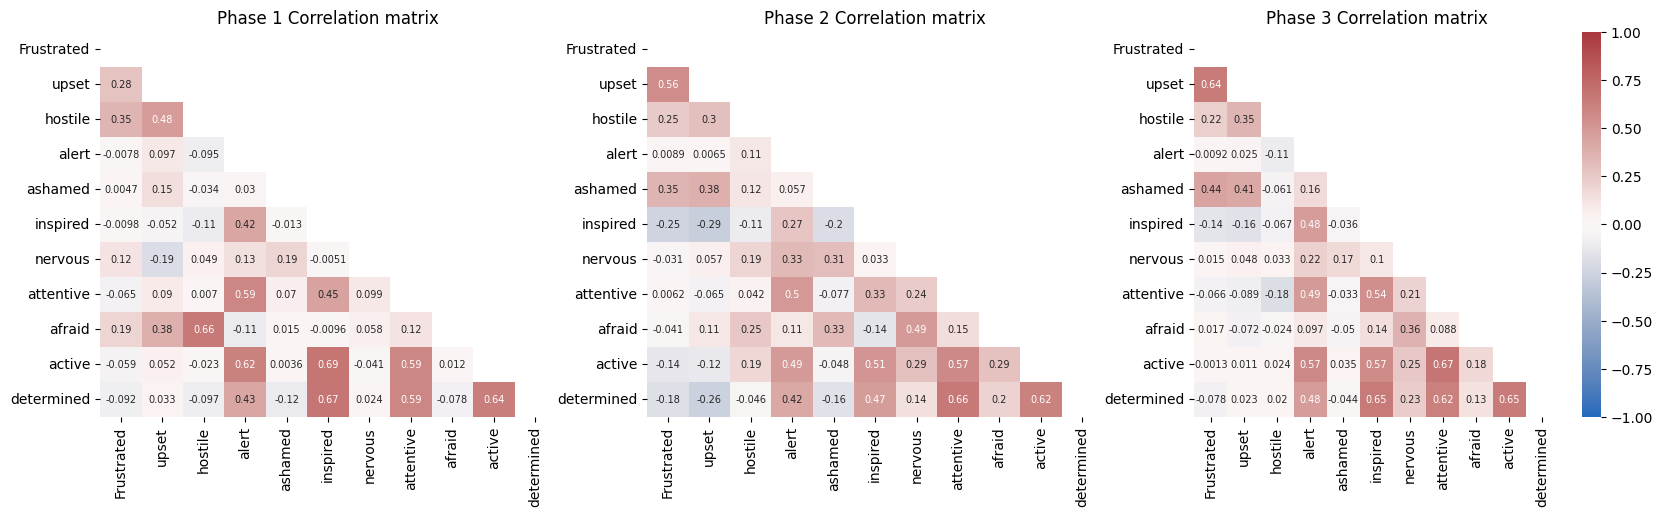

In [517]:
# Subset with only relevant features
questionnaire_subset_ph1 = questionnaire[questionnaire['Phase']=='phase1'][questionnaire_features]
questionnaire_subset_ph2 = questionnaire[questionnaire['Phase']=='phase2'][questionnaire_features]
questionnaire_subset_ph3 = questionnaire[questionnaire['Phase']=='phase3'][questionnaire_features]

# Triangular correlation matrix
mask_ph1 = np.triu(np.ones_like(questionnaire_subset_ph1.corr(), dtype=bool))
mask_ph2 = np.triu(np.ones_like(questionnaire_subset_ph2.corr(), dtype=bool))
mask_ph3 = np.triu(np.ones_like(questionnaire_subset_ph3.corr(), dtype=bool))

# Correlation heatmap
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title('Phase 1 Correlation matrix')
sns.heatmap(questionnaire_subset_ph1.corr(), mask=mask_ph1, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
plt.subplot(1, 3, 2)
plt.title('Phase 2 Correlation matrix')
sns.heatmap(questionnaire_subset_ph2.corr(), mask=mask_ph2, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1, cbar=False)
plt.subplot(1, 3, 3)
plt.title('Phase 3 Correlation matrix')
sns.heatmap(questionnaire_subset_ph3.corr(), mask=mask_ph3, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)

plt.show()

__________

## Preprocess data

In [518]:
# List of columns to remove (questionnaire + ID columns will be re-added manually in front)
remove_columns = questionnaire_features + id_columns

# Keep only the physiological features
features = [col for col in data.columns if col not in remove_columns]

# Arrange the final DataFrame with ID columns first
final_data = data[id_columns + features]
final_data.head()

,Round,Phase,Individual,Puzzler,original_ID,raw_data_path,Team_ID,Cohort,HR_TD_Mean,HR_TD_Median,...,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
0,round_3,phase3,1,1,19.0,dataset/D1_4/ID_1/round_3/phase3,D1_4_Team10,D1_4,78.663878,76.70,...,213.374114,1.345997,-1.379434,-0.000144,0.000138,0.000010,1.036040e-05,11,2.522727,2.075000
1,round_3,phase2,1,1,19.0,dataset/D1_4/ID_1/round_3/phase2,D1_4_Team10,D1_4,76.540732,76.61,...,213.235380,0.887010,0.854067,-0.000146,0.000165,0.000009,7.714503e-06,15,2.214286,2.192308
2,round_3,phase1,1,1,19.0,dataset/D1_4/ID_1/round_3/phase1,D1_4_Team10,D1_4,78.173563,77.92,...,173.465157,0.205817,0.480581,-0.000112,0.000132,0.000002,1.799914e-06,10,1.972222,2.111111
3,round_2,phase3,1,1,19.0,dataset/D1_4/ID_1/round_2/phase3,D1_4_Team10,D1_4,83.073688,83.88,...,191.943390,2.488339,1.246665,-0.000455,0.000481,-0.000001,-1.355151e-07,12,1.886364,1.805556
4,round_2,phase2,1,1,19.0,dataset/D1_4/ID_1/round_2/phase2,D1_4_Team10,D1_4,72.281250,72.91,...,192.341180,1.196508,1.592099,-0.000420,0.000334,0.000014,1.267198e-05,20,1.812500,1.926471


# Analyse physiological measures

***The features were chosen manually based on the distribution differences between phase 1, 2, and 3 for the individual features!***

EDA is said to be a good measure of stress responses: https://www.ncbi.nlm.nih.gov/books/NBK589926/#ch5

In [519]:
# Features to compare
features = ['EDA_TD_P_Peaks', 'EDA_TD_P_Skew', 'EDA_TD_P_ReT', 'EDA_TD_P_Slope', 'EDA_TD_P_Slope_mean', 'EDA_TD_P_RT',   
'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope']

# Compute task mean (phase2)
task_data = final_data[final_data['Phase'] == 'phase2'].groupby("Individual")[features].mean()
task_data.columns = [f"{col}_Task" for col in task_data.columns]

task_data.head()

,EDA_TD_P_Peaks_Task,EDA_TD_P_Skew_Task,EDA_TD_P_ReT_Task,EDA_TD_P_Slope_Task,EDA_TD_P_Slope_mean_Task,EDA_TD_P_RT_Task,EDA_TD_T_Slope_min_Task,EDA_TD_T_Slope_max_Task,EDA_TD_T_Slope_mean_Task,EDA_TD_T_Slope_Task
Individual,,,,,,,,,,
1,16.75,4.574814,2.052016,0.000003,0.000004,1.937369,-0.000287,0.000338,0.000006,0.000006
2,32.50,1.987789,1.656207,0.000320,0.000457,1.935707,-0.030318,0.028505,0.000163,0.000159
3,38.25,2.000525,1.814105,0.000029,0.000182,1.903048,-0.003355,0.006125,0.000363,0.000374
4,41.00,1.574065,1.554798,0.001240,0.001536,1.568600,-0.045231,0.040945,0.001768,0.001848
5,31.50,2.348305,1.758533,0.000981,0.000921,2.121259,-0.029334,0.028893,0.000111,0.000228


In [520]:
# Apply standardization to the features - KMeans and PCA are sensitive to scale
scaler = StandardScaler()
task_data_scaled = scaler.fit_transform(task_data)
task_data_scaled = pd.DataFrame(task_data_scaled, columns=task_data.columns)


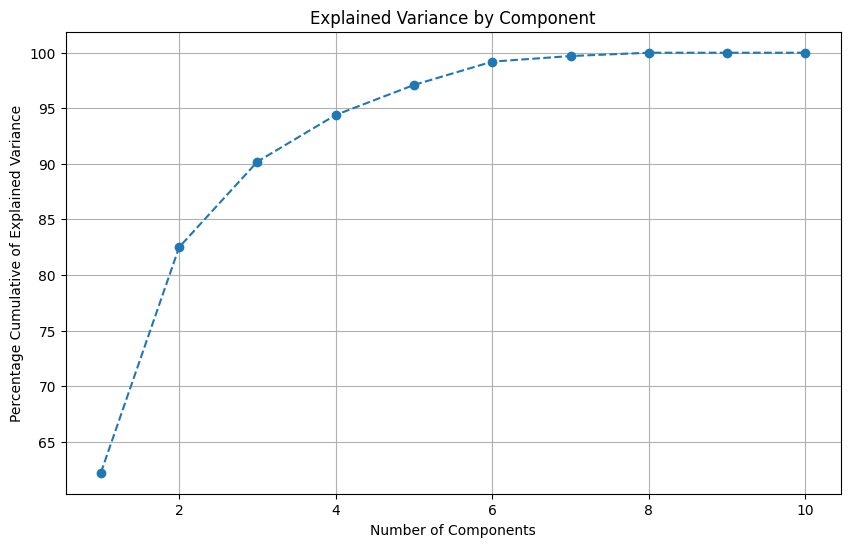

In [521]:
# PCA to reduce dimensionality
# Perform PCA analysis to find the number of components to keep
pca = PCA()
pca.fit(task_data_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

In [522]:
pca = PCA(n_components = 3)
task_data_scaled_reduced = pca.fit_transform(task_data_scaled)

Gap statistics gives weird results :/

In [523]:
clustersNr = 10
[N, p] = task_data_scaled_reduced.shape
minX = list(np.min(task_data_scaled_reduced, axis=0)) # data range min
maxX = list(np.max(task_data_scaled_reduced, axis=0)) # data range max
list_of_clusters = range(1,clustersNr + 1)
Nsim = 20
Wu = np.zeros((clustersNr, Nsim))
W = np.zeros(clustersNr)
for nrClusters in list_of_clusters: # Want actual number included
    kmeans = KMeans(n_clusters=nrClusters, init = "k-means++", random_state = 42, n_init='auto').fit(task_data_scaled_reduced)
    C = kmeans.cluster_centers_ # the cluster centers in the p dimensions
    labelCluster = kmeans.labels_ # the labelling for each point
    
    # Compute within-class dissimilarity given X (the data), C (the cluster centers)
    # and gr (the predicted cluster numbers)
    for cluster in range(1, nrClusters + 1):
        Ik = np.where(labelCluster == cluster - 1)[0]
        dk = np.sum((task_data_scaled_reduced[Ik, :] - np.multiply(np.ones((np.size(Ik), 1)), C[cluster - 1, :]))**2, axis = 1)  
        Dk = np.sum(dk)
        W[nrClusters-1] += Dk
    
    
    # gap-statistic
    # Nsim simulations of data uniformly distributed over [X]
    for j in range(Nsim):
        # simulate uniformly distributed data
        Xu = np.ones((N,1))*minX + np.random.rand(N,p)*(np.ones((N,1))*maxX-np.ones((N,1))*minX)
        # perform K-means
        kmeansU = KMeans(n_clusters=nrClusters, init = "k-means++", random_state = 42, n_init='auto').fit(Xu)
        Cu = kmeansU.cluster_centers_
        labelClusterU = kmeansU.labels_

        # Compute within-class dissmiliarity for the simulated data given Xu (the simulated data),
        # Cu (the cluster centers for the simulated data), and gru (the predicted cluster numbers)
        # for the simulated data).
        for cluster in range(1, nrClusters+1):
            Iku = np.where(labelClusterU == cluster - 1)
            dku = np.sum((Xu[Iku, :] - np.multiply(np.ones((np.size(Iku), 1)), Cu[cluster - 1, :]))**2, axis = 1)  
            Dku = np.sum(dku)
            Wu[nrClusters - 1, j] += Dku
        
# compute expectation of simulated within-class dissimilarities, and the 
# standard errors for the error bars
Elog_Wu = np.mean(np.log(Wu), axis = 1)
sk = np.std(np.log(Wu), axis=1)*np.sqrt(1+1/Nsim) # standard error sk' in (14.39)
x_range = np.array(range(nrClusters)) + 1

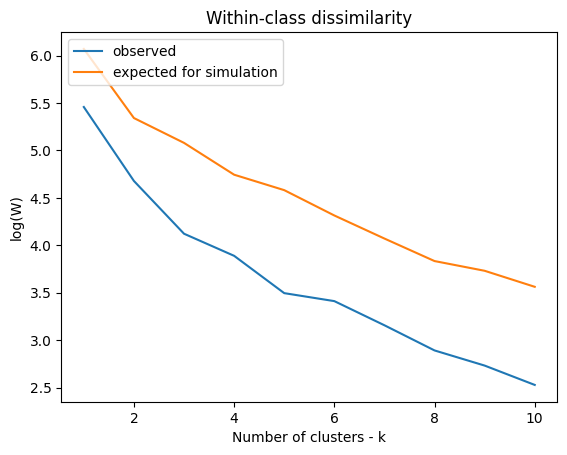

In [524]:
# Plot the log within class scatters
plt.figure()
plt.title("Within-class dissimilarity")
plt.plot(x_range, np.log(W), label='observed')
plt.plot(x_range, Elog_Wu, label='expected for simulation')
plt.legend(loc='upper left')
plt.xlabel("Number of clusters - k")
plt.ylabel("log(W)")
plt.show()

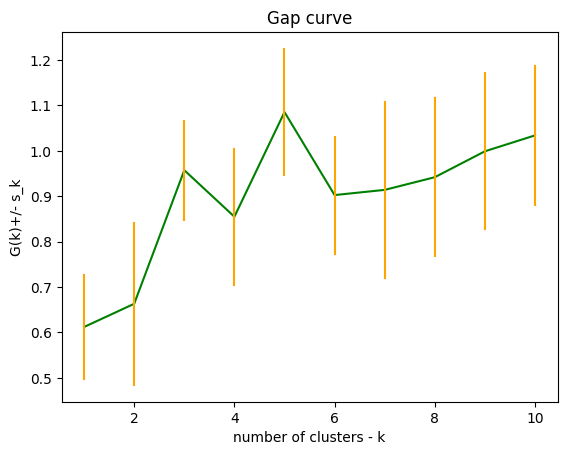

In [525]:
# plot the Gap curve
plt.figure()
plt.title('Gap curve')
Gk =  Elog_Wu.T - np.log(W)
plt.plot(x_range,Gk,color='green')
x_range_list = []
x_range_list.append(x_range)
x_range_list.append(x_range)
GkList = []
GkList.append(Gk-sk)
GkList.append(Gk+sk)
plt.plot(x_range_list, GkList, color='orange')
plt.ylabel('G(k)+/- s_k')
plt.xlabel('number of clusters - k')
plt.show()

In [526]:
# Implementation of the rule for estimating K*, see ESL (14.39), p. 519
K_opt = np.where(np.array(Gk[:-1]) >= np.array(Gk[1:] - sk[1:]))[0]

if not K_opt.size:
    K_opt = clustersNr
    print ("Gap-statistic, optimal K = %d" % K_opt)
else:    
    print ("Gap-statistic, optimal K = %d" % list_of_clusters[K_opt[0]])

Gap-statistic, optimal K = 1


remove

----------------

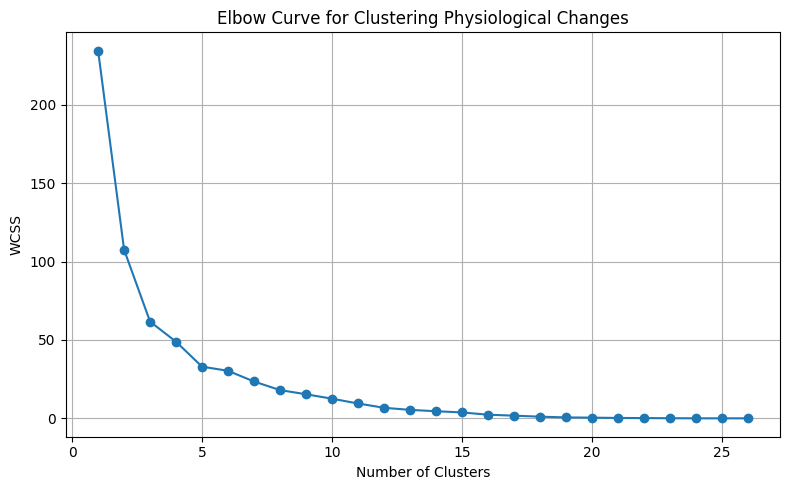

In [527]:
# Elbow method: Calculate inertia for k from 1 to 10
WCSS = []
for i in range(1,27):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42, n_init='auto')
  kmeans_pca.fit(task_data_scaled_reduced)
  WCSS.append(kmeans_pca.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1,27), WCSS, marker='o')
plt.title("Elbow Curve for Clustering Physiological Changes")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()

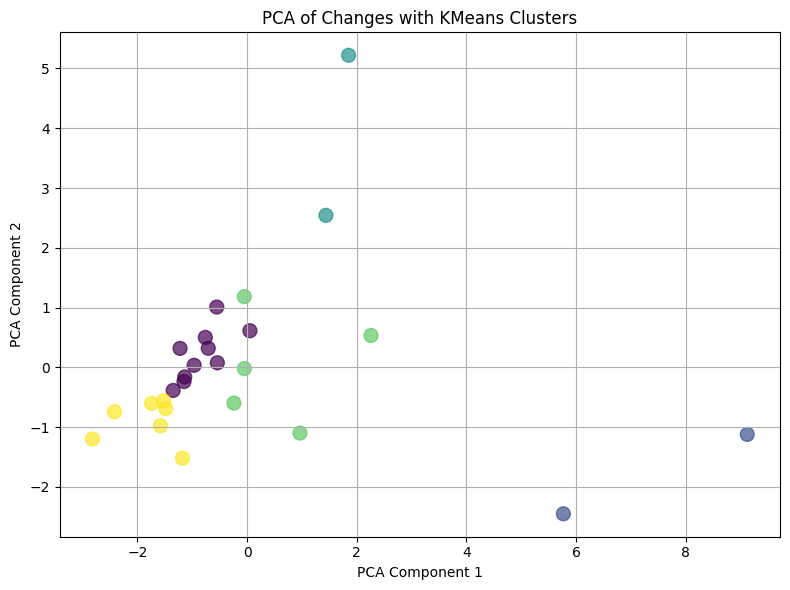

In [528]:
# KMeans clustering on PCA result
kmeans = KMeans(n_clusters=5, random_state=42, init = "k-means++", n_init='auto')
labels_kmeans = kmeans.fit_predict(task_data_scaled_reduced)

# Plot PCA with clusters
plt.figure(figsize=(8, 6))
plt.scatter(task_data_scaled_reduced[:, 0], task_data_scaled_reduced[:, 1], c=labels_kmeans, cmap="viridis", s=100, alpha=0.7)
plt.title("PCA of Changes with KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

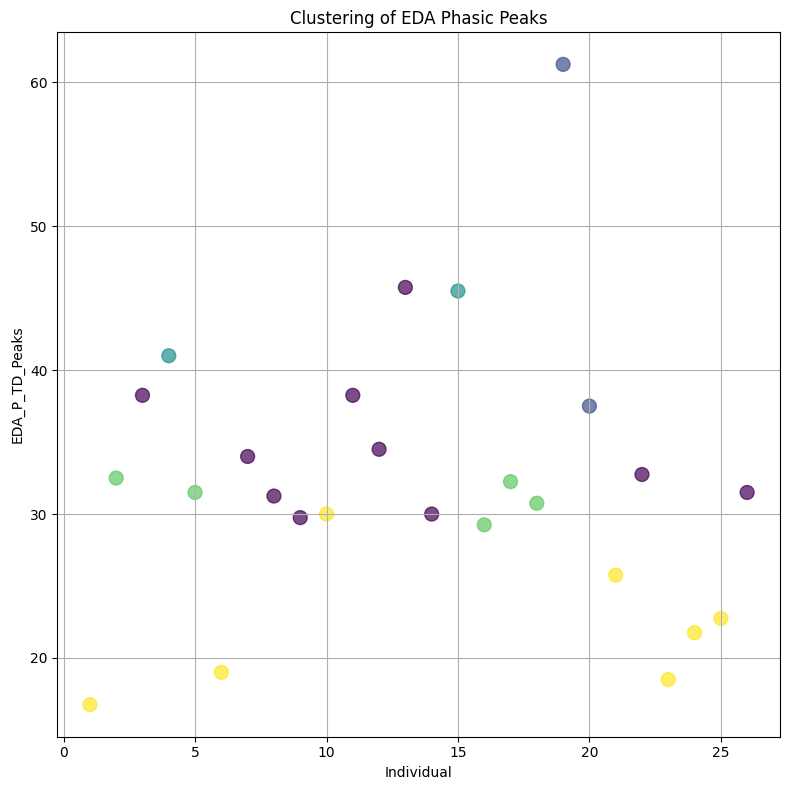

In [529]:
# Plot the results
plt.figure(figsize=(8, 8))
plt.scatter(task_data.index, task_data["EDA_TD_P_Peaks_Task"], 
            c=labels_kmeans, cmap="viridis", s=100, alpha=0.7)
plt.title("Clustering of EDA Phasic Peaks")
plt.xlabel("Individual")
plt.ylabel("EDA_P_TD_Peaks")
plt.grid(True)
plt.tight_layout()
plt.show()

hierarchical clustering

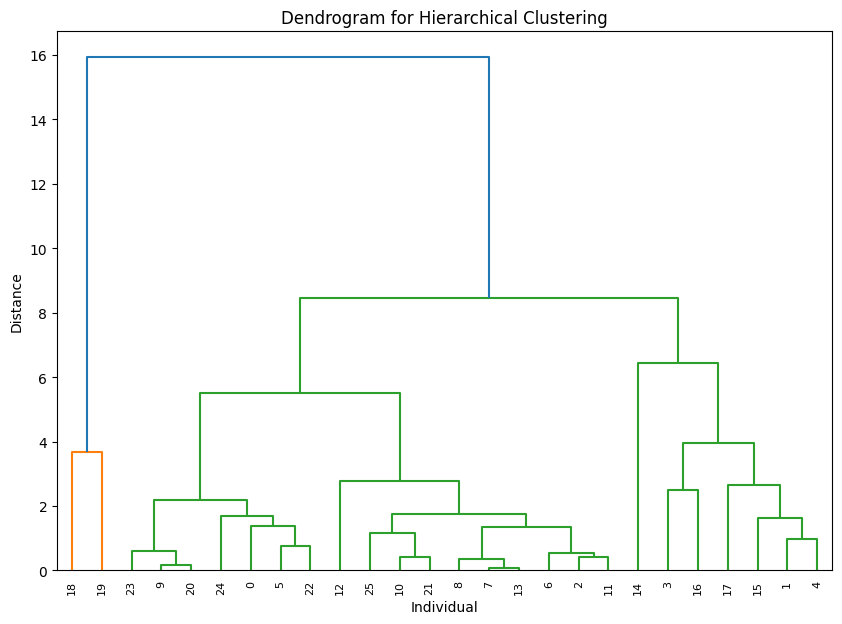

In [530]:

# Create a dendrogram to visualize how clusters are formed
plt.figure(figsize=(10, 7))
Z = linkage(task_data_scaled_reduced, method='ward', metric='euclidean')
dendrogram(Z, leaf_rotation=90.,
    leaf_font_size=8.,
    truncate_mode='lastp')
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Individual')
plt.ylabel('Distance')
plt.show()


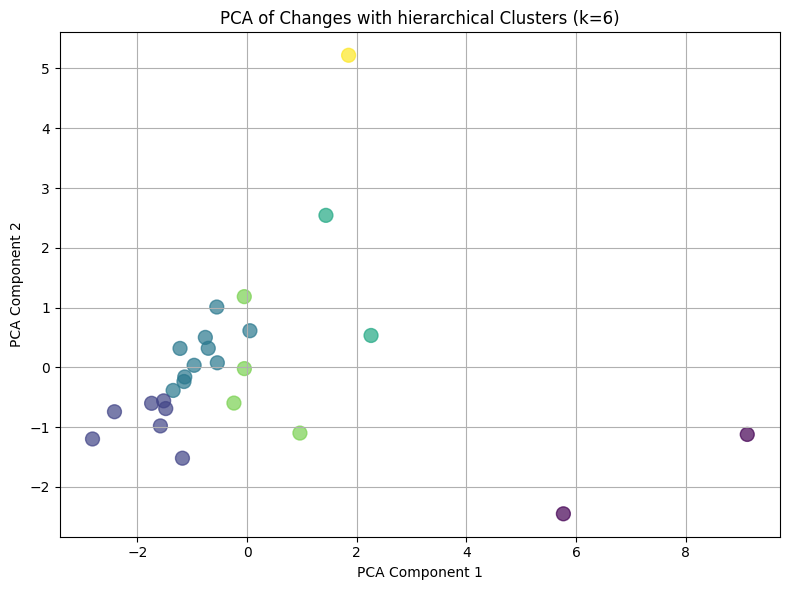

In [531]:
# Fit Hierarchical Clustering
k = 6  # Number of clusters
labels_hierarchical = fcluster(Z, k, criterion='maxclust')

# Plot PCA with clusters
plt.figure(figsize=(8, 6))
plt.scatter(task_data_scaled_reduced[:, 0], task_data_scaled_reduced[:, 1], c=labels_hierarchical, cmap="viridis", s=100, alpha=0.7)
plt.title("PCA of Changes with hierarchical Clusters (k=6)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()



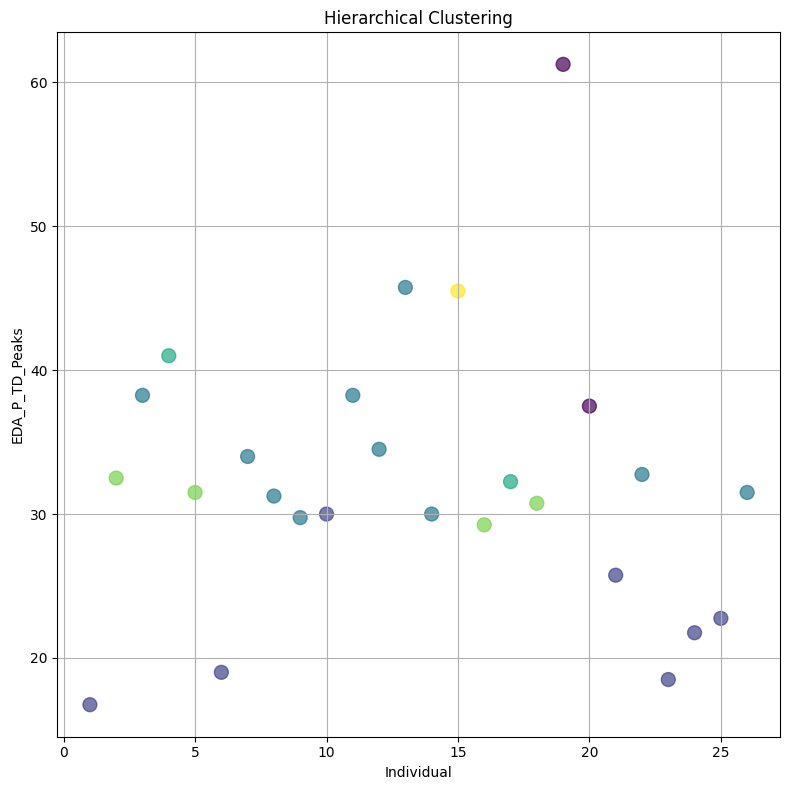

In [532]:
# Visualize clusters (optional, based on PCA if necessary)
plt.figure(figsize=(8, 8))
plt.scatter(task_data.index, task_data["EDA_TD_P_Peaks_Task"], 
            c=labels_hierarchical, cmap="viridis", s=100, alpha=0.7)
plt.title("Hierarchical Clustering")
plt.xlabel("Individual")
plt.ylabel("EDA_P_TD_Peaks")
plt.grid(True)
plt.tight_layout()
plt.show()


GMM clustering

In [533]:
k = 15
BIC = np.zeros((k))
AIC = np.zeros((k))
# Investigate AIC + BIC
for k in range(1,k+1):
    # See https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
    #Notice the different extra parameters in the provided Gaussian Mixture function - they might be necessary.
    
    gaussMix = GaussianMixture(n_components = k, covariance_type  = "full", max_iter = 1000, reg_covar = 0.01)
    BIC[k-1] = gaussMix.fit(task_data_scaled_reduced).bic(task_data_scaled_reduced)
    AIC[k-1] = gaussMix.fit(task_data_scaled_reduced).aic(task_data_scaled_reduced)

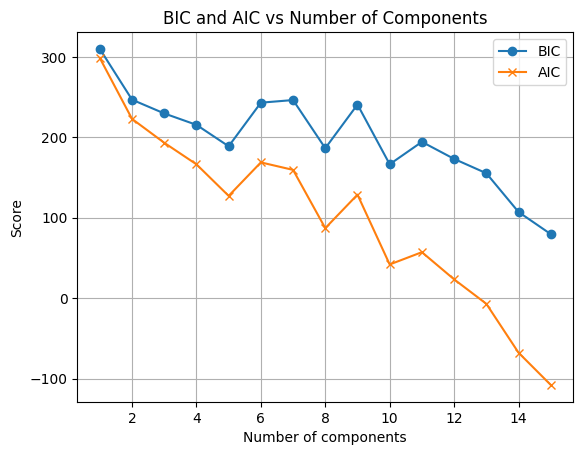

In [534]:
bic_scores = []
aic_scores = []

for k in range(1,k+1):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(task_data_scaled_reduced)
    bic_scores.append(gmm.bic(task_data_scaled_reduced))
    aic_scores.append(gmm.aic(task_data_scaled_reduced))

plt.plot(range(1, 16), bic_scores, label='BIC', marker='o')
plt.plot(range(1, 16), aic_scores, label='AIC', marker='x')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('BIC and AIC vs Number of Components')
plt.legend()
plt.grid(True)
plt.show()


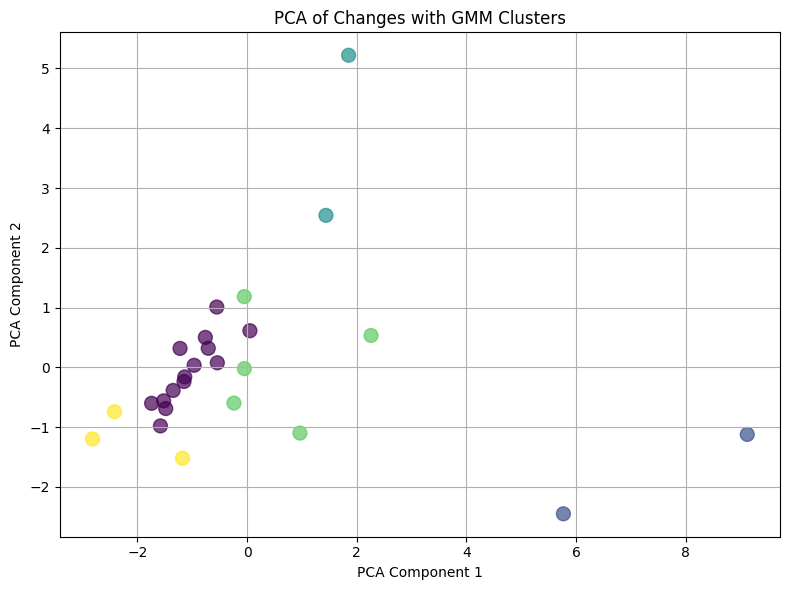

In [535]:
from sklearn.mixture import GaussianMixture

# Fit GMM
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42, max_iter = 1000, reg_covar = 0.01) 
gmm_labels = gmm.fit_predict(task_data_scaled_reduced)

# Plot PCA with clusters
plt.figure(figsize=(8, 6))
plt.scatter(task_data_scaled_reduced[:, 0], task_data_scaled_reduced[:, 1], c=gmm_labels, cmap="viridis", s=100, alpha=0.7)
plt.title("PCA of Changes with GMM Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


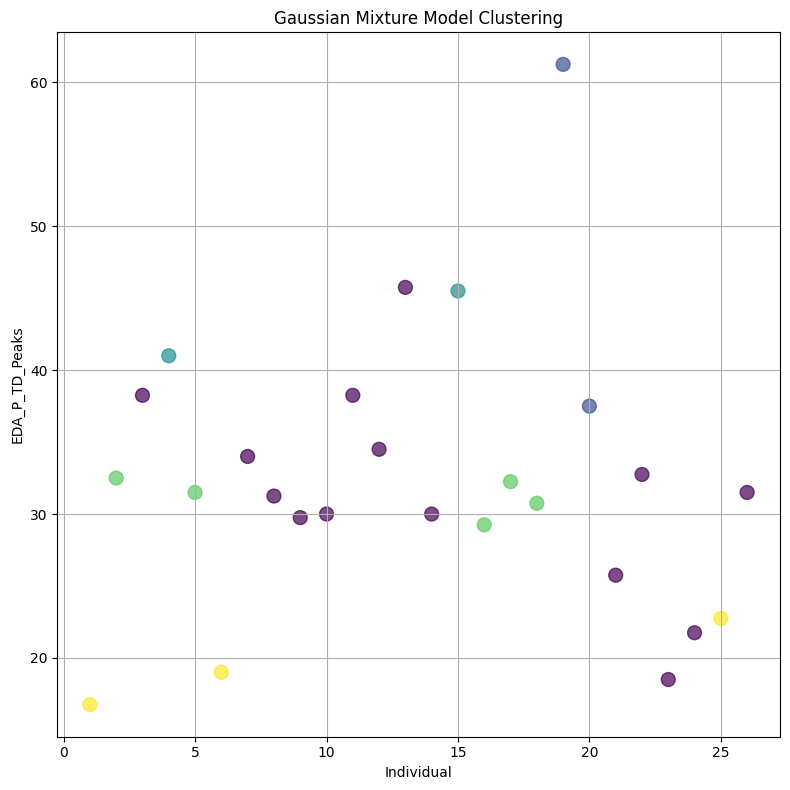

In [536]:
# Visualize clusters (optional, based on PCA if necessary)
plt.figure(figsize=(8, 8))
plt.scatter(task_data.index, task_data["EDA_TD_P_Peaks_Task"], 
            c=gmm_labels, cmap="viridis", s=100, alpha=0.7)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Individual")
plt.ylabel("EDA_P_TD_Peaks")
plt.grid(True)
plt.tight_layout()
plt.show()


In [537]:
# Silhouette Score for K-means - higher is better
silhouette_kmeans = silhouette_score(task_data_scaled, labels_kmeans)
print(f"Silhouette Score for K-means: {silhouette_kmeans}")
# Davies-Bouldin Score for K-means - lower is better
davies_bouldin_kmeans = davies_bouldin_score(task_data_scaled, labels_kmeans)
print(f"Davies-Bouldin Score for K-means: {davies_bouldin_kmeans}")
# Calinski-Harabasz Score for K-means - higher is better
calinski_kmeans = calinski_harabasz_score(task_data_scaled, labels_kmeans)
print(f"Calinski-Harabasz Score for K-means: {calinski_kmeans}")

# Silhouette Score for Hierarchical Clustering
print("-----------------")
silhouette_hierarchical = silhouette_score(task_data_scaled, labels_hierarchical)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}")
# Davies-Bouldin Score for Hierarchical Clustering
davies_bouldin_hierarchical = davies_bouldin_score(task_data_scaled, labels_hierarchical)
print(f"Davies-Bouldin Score for Hierarchical Clustering: {davies_bouldin_hierarchical}")
# Calinski-Harabasz Score for Hierarchical Clustering
calinski_hierarchical = calinski_harabasz_score(task_data_scaled, labels_hierarchical)
print(f"Calinski-Harabasz Score for Hierarchical Clustering: {calinski_hierarchical}")

# Silhouette Score for GMM
print("-----------------")
silhouette_gmm = silhouette_score(task_data_scaled, gmm_labels)
print(f"Silhouette Score for GMM: {silhouette_gmm}")
# Davies-Bouldin Score for GMM
davies_bouldin_gmm = davies_bouldin_score(task_data_scaled, gmm_labels)
print(f"Davies-Bouldin Score for GMM: {davies_bouldin_gmm}")
# Calinski-Harabasz Score for GMM
calinski_gmm = calinski_harabasz_score(task_data_scaled, gmm_labels)
print(f"Calinski-Harabasz Score for GMM: {calinski_gmm}")

Silhouette Score for K-means: 0.253238759983198
Davies-Bouldin Score for K-means: 0.9807507372331766
Calinski-Harabasz Score for K-means: 19.543205083894915
-----------------
Silhouette Score for Hierarchical Clustering: 0.22408182302558008
Davies-Bouldin Score for Hierarchical Clustering: 0.9428189762093369
Calinski-Harabasz Score for Hierarchical Clustering: 17.362484487387427
-----------------
Silhouette Score for GMM: 0.23940796820844892
Davies-Bouldin Score for GMM: 1.015110282055354
Calinski-Harabasz Score for GMM: 17.630218015833375


In [538]:
# Compute cluster summary
task_data["Cluster"] = labels_kmeans
cluster_summary = task_data.groupby("Cluster").mean().reset_index()
cluster_summary

,Cluster,EDA_TD_P_Peaks_Task,EDA_TD_P_Skew_Task,EDA_TD_P_ReT_Task,EDA_TD_P_Slope_Task,EDA_TD_P_Slope_mean_Task,EDA_TD_P_RT_Task,EDA_TD_T_Slope_min_Task,EDA_TD_T_Slope_max_Task,EDA_TD_T_Slope_mean_Task,EDA_TD_T_Slope_Task
0,0,34.600000,2.520718,1.839945,0.000086,0.000155,1.796374,-0.005708,0.007778,0.000271,0.000271
1,1,49.375000,0.361600,1.077777,0.003244,0.005521,1.582776,-0.155719,0.113457,-0.002774,-0.002376
2,2,43.250000,1.697005,1.427507,0.000758,0.001502,1.522501,-0.065162,0.067807,0.002648,0.002784
3,3,31.250000,2.042525,1.663124,0.000584,0.000916,1.915811,-0.057300,0.052052,0.000124,0.000252
4,4,22.071429,3.256445,2.025629,0.000176,0.000243,1.974746,-0.011372,0.011071,0.000036,0.000058


## Assign each individual a stress result based on findings

In [539]:
final_data.loc[:, 'StressLevel'] = task_data['Cluster']
final_data.loc[:, 'StressLevel'] = final_data['StressLevel'].replace({'0': '0', '1': '2', '2': '1'})
# 0 is least stressed, 1 is moderate stress, 2 is most stressed -- based on the clustering values of EDA_TD_P_Peaks

C:\Users\Beatriz\AppData\Local\Temp\ipykernel_28224\3804538171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:, 'StressLevel'] = task_data['Cluster']


# Analyse self-reported measures

In [540]:
# Step 2: Merge based on Round, Phase, and Individual
merged_data = pd.merge(
    final_data[final_data['Phase'] == 'phase2'],
    questionnaire,
    on=["Round", "Phase", "Individual", "Puzzler"],
    suffixes=("_physio", "_selfreport")
)
merged_data

,Round,Phase,Individual,Puzzler,original_ID_physio,raw_data_path_physio,Team_ID_physio,Cohort_physio,HR_TD_Mean,HR_TD_Median,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,round_3,phase2,1,1,19.0,dataset/D1_4/ID_1/round_3/phase2,D1_4_Team10,D1_4,76.540732,76.61,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
1,round_2,phase2,1,1,19.0,dataset/D1_4/ID_1/round_2/phase2,D1_4_Team10,D1_4,72.281250,72.91,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0
2,round_4,phase2,1,1,19.0,dataset/D1_4/ID_1/round_4/phase2,D1_4_Team10,D1_4,76.542762,75.58,...,1.0,1.0,2.0,1.0,3.0,2.0,4.0,1.0,3.0,3.0
3,round_1,phase2,1,1,19.0,dataset/D1_4/ID_1/round_1/phase2,D1_4_Team10,D1_4,73.961289,71.53,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0
4,round_3,phase2,2,0,20.0,dataset/D1_4/ID_3/round_3/phase2,D1_4_Team10,D1_4,77.586134,76.67,...,1.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,round_1,phase2,25,0,24.0,dataset/D1_5/ID_1/round_1/phase2,D1_5_Team12,D1_5,66.570189,62.91,...,1.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,3.0,3.0
100,round_3,phase2,26,1,23.0,dataset/D1_5/ID_2/round_3/phase2,D1_5_Team12,D1_5,108.283258,106.63,...,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
101,round_2,phase2,26,1,23.0,dataset/D1_5/ID_2/round_2/phase2,D1_5_Team12,D1_5,96.442981,94.03,...,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,3.0,2.0
102,round_4,phase2,26,1,23.0,dataset/D1_5/ID_2/round_4/phase2,D1_5_Team12,D1_5,82.019065,78.83,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


In [541]:
positive_items = ['active', 'alert', 'attentive', 'determined', 'inspired']
negative_items = ['afraid', 'ashamed', 'hostile', 'nervous', 'upset']

merged_data["Positive_Feelings"] = merged_data[positive_items].mean(axis=1)
merged_data["Negative_Feelings"] = merged_data[negative_items].mean(axis=1)

In [542]:
# Step 1: Calculate a combined self-report stress score
# Normalize Frustrated to 0–1 scale (since it ranges 0–10)
merged_data["Frustrated_Norm"] = merged_data["Frustrated"] / 10

# Combine Negative Affect and Frustrated into a "SelfReported_Stress"
merged_data["SelfReported_Stress"] = (merged_data["Negative_Feelings"] / 5 + merged_data["Frustrated_Norm"]) / 2

# Step 2: Normalize physiological stress level (already in range 0-2)
merged_data["Physio_Stress"] = merged_data["StressLevel"] / 2

# Step 3: Calculate discrepancy (positive means self-report > physio, negative means the opposite)
merged_data["Stress_Discrepancy"] = merged_data["SelfReported_Stress"] - merged_data["Physio_Stress"]

# Step 4: Categorize individuals into 3 conceptual clusters
def categorize_discrepancy(diff):
    if diff >= 0.2:
        return "Reported more stress than recorded"
    elif diff <= -0.2:
        return "Reported less stress than recorded"
    else:
        return "Reported stress matches bracelet"

merged_data["Stress_Cluster"] = merged_data["Stress_Discrepancy"].apply(categorize_discrepancy)

# Step 5: Count individuals per cluster
stress_cluster_summary = merged_data.groupby("Stress_Cluster")["Individual"].nunique().reset_index(name="Unique Individuals")

print(stress_cluster_summary)

# Show a sample of how individuals are categorized
merged_data[["Individual", "StressLevel", "Negative_Feelings", "Frustrated", "SelfReported_Stress", "Physio_Stress", "Stress_Discrepancy", "Stress_Cluster"]].head()

                       Stress_Cluster  Unique Individuals
0  Reported less stress than recorded                   3
1    Reported stress matches bracelet                  26


,Individual,StressLevel,Negative_Feelings,Frustrated,SelfReported_Stress,Physio_Stress,Stress_Discrepancy,Stress_Cluster
0,1,4.0,1.6,3.0,0.31,2.0,-1.69,Reported less stress than recorded
1,1,2.0,2.2,2.0,0.32,1.0,-0.68,Reported less stress than recorded
2,1,0.0,1.2,0.0,0.12,0.0,0.12,Reported stress matches bracelet
3,1,4.0,1.8,3.0,0.33,2.0,-1.67,Reported less stress than recorded
4,2,0.0,1.0,0.0,0.10,0.0,0.10,Reported stress matches bracelet


In [543]:
# Filter the group and select only the requested columns
filtered_data = merged_data[merged_data["Stress_Cluster"].str.strip() == "Reported less stress than recorded"]
columns_to_show = [
    "Individual", "StressLevel", "Negative_Feelings", 
    "Frustrated", "SelfReported_Stress", 
    "Physio_Stress", "Stress_Discrepancy"
]

# Display the result
filtered_data[columns_to_show]

,Individual,StressLevel,Negative_Feelings,Frustrated,SelfReported_Stress,Physio_Stress,Stress_Discrepancy
0,1,4.0,1.6,3.0,0.31,2.0,-1.69
1,1,2.0,2.2,2.0,0.32,1.0,-0.68
3,1,4.0,1.8,3.0,0.33,2.0,-1.67
5,2,3.0,1.0,1.0,0.15,1.5,-1.35
8,3,4.0,1.2,2.0,0.22,2.0,-1.78
